In [96]:
import os
import sys
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_json('IMDB_movie_details.json', lines=True)
review = pd.read_json('IMDB_reviews.json', lines=True)


In [71]:
review.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [66]:
import matplotlib as plt

df.describe()

df['year'] = pd.DatetimeIndex(df['release_date']).year
df['month'] = pd.DatetimeIndex(df['release_date']).month

df.describe()

,rating,year,month
count,1572.000000,1572.000000,1572.000000
mean,7.071819,2000.917939,7.128499
std,0.967966,13.942056,3.555153
min,2.400000,1921.000000,1.000000
25%,6.500000,1995.000000,4.000000
50%,7.100000,2003.000000,7.000000
75%,7.800000,2010.000000,11.000000
max,9.500000,2018.000000,12.000000


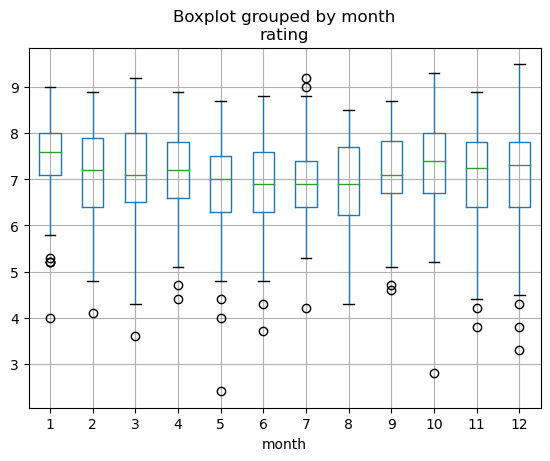

In [67]:
import matplotlib.pyplot as plt
df.boxplot(column=['rating'], by ='month')
plt.show()

In [55]:
df1 = df.groupby('year').describe()

In [60]:
pd.set_option('display.max_rows',78)

In [61]:
df1.head(n=78)

rating                                                  
      count      mean       std  min    25%   50%    75%  max
year                                                         
1921    1.0  8.300000       NaN  8.3  8.300  8.30  8.300  8.3
1925    1.0  8.200000       NaN  8.2  8.200  8.20  8.200  8.2
1927    3.0  8.233333  0.057735  8.2  8.200  8.20  8.250  8.3
1928    1.0  8.200000       NaN  8.2  8.200  8.20  8.200  8.2
1931    2.0  8.500000  0.141421  8.4  8.450  8.50  8.550  8.6
1934    1.0  8.200000       NaN  8.2  8.200  8.20  8.200  8.2
1936    1.0  8.500000       NaN  8.5  8.500  8.50  8.500  8.5
1939    2.0  8.150000  0.070711  8.1  8.125  8.15  8.175  8.2
1940    3.0  8.166667  0.057735  8.1  8.150  8.20  8.200  8.2
1941    3.0  8.333333  0.208167  8.1  8.250  8.40  8.450  8.5
1943    1.0  8.500000       NaN  8.5  8.500  8.50  8.500  8.5
1944    1.0  8.300000       NaN  8.3  8.300  8.30  8.300  8.3
1947    2.0  8.350000  0.353553  8.1  8.225  8.35  8.475  8.6
1948    1.0  8.300000       NaN  8.3  8.300  8.30  8.300  8.3
1949    2.0  8.250000  0.070711  8.2  8.225  8.25  8.275  8.3
1950    2.0  8.400000  0.141421  8.3  8.350  8.40  8.450  8.5
1951    1.0  8.300000       NaN  8.3  8.300  8.30  8.300  8.3
1952    1.0  8.300000       NaN  8.3  8.300  8.30  8.300  8.3
1954    3.0  8.300000  0.173205  8.2  8.200  8.20  8.350  8.5
1955    2.0  8.150000  0.070711  8.1  8.125  8.15  8.175  8.2
1956    2.0  8.500000  0.282843  8.3  8.400  8.50  8.600  8.7
1957    4.0  8.425000  0.330404  8.2  8.200  8.30  8.525  8.9
1958    4.0  8.275000  0.150000  8.1  8.175  8.30  8.400  8.4
1959    4.0  8.250000  0.129099  8.1  8.175  8.25  8.325  8.4
1960    3.0  8.300000  0.200000  8.1  8.200  8.30  8.400  8.5
1961    2.0  8.300000  0.000000  8.3  8.300  8.30  8.300  8.3
1962    1.0  8.300000       NaN  8.3  8.300  8.30  8.300  8.3
1963    3.0  8.200000  0.100000  8.1  8.150  8.20  8.250  8.3
1964    1.0  8.500000       NaN  8.5  8.500  8.50  8.500  8.5
1967    4.0  8.375000  0.359398  8.1  8.175  8.25  8.450  8.9
1968    1.0  8.300000       NaN  8.3  8.300  8.30  8.300  8.3
1969    2.0  8.300000  0.282843  8.1  8.200  8.30  8.400  8.5
1972    3.0  8.566667  0.550757  8.2  8.250  8.30  8.750  9.2
1973    3.0  8.266667  0.057735  8.2  8.250  8.30  8.300  8.3
1974    2.0  8.600000  0.565685  8.2  8.400  8.60  8.800  9.0
1975    5.0  8.220000  0.294958  8.0  8.000  8.10  8.300  8.7
1976    3.0  8.166667  0.115470  8.1  8.100  8.10  8.200  8.3
1977    2.0  8.400000  0.424264  8.1  8.250  8.40  8.550  8.7
1979    4.0  8.325000  0.206155  8.1  8.175  8.35  8.500  8.5
1980    5.0  8.340000  0.279285  8.1  8.200  8.20  8.400  8.8
1981    1.0  8.500000       NaN  8.5  8.500  8.50  8.500  8.5
1982    3.0  8.266667  0.115470  8.2  8.200  8.20  8.300  8.4
1983    3.0  8.266667  0.152753  8.1  8.200  8.30  8.350  8.4
1984    5.0  8.180000  0.164317  8.0  8.100  8.10  8.300  8.4
1985    3.0  8.300000  0.173205  8.2  8.200  8.20  8.350  8.5
1986    3.0  8.200000  0.173205  8.1  8.100  8.10  8.250  8.4
1987    3.0  8.166667  0.115470  8.1  8.100  8.10  8.200  8.3
1988    3.0  8.300000  0.173205  8.2  8.200  8.20  8.350  8.5
1989    2.0  8.150000  0.212132  8.0  8.075  8.15  8.225  8.3
1990   47.0  6.523404  1.151032  2.8  5.950  6.60  7.300  8.7
1991   50.0  6.768000  0.865304  4.7  6.200  6.75  7.400  8.6
1992   45.0  6.833333  0.810443  5.0  6.500  6.90  7.500  8.3
1993   51.0  6.935294  0.969706  4.0  6.500  7.10  7.600  8.1
1994   54.0  6.922222  1.104137  3.8  6.025  6.95  7.600  9.3
1995   48.0  6.835417  0.945648  4.7  6.175  6.80  7.525  8.6
1996   51.0  6.862745  0.896875  4.3  6.300  6.90  7.400  8.4
1997   49.0  6.740816  1.027724  3.7  6.200  6.90  7.500  8.4
1998   49.0  6.736735  0.933339  4.8  6.100  6.70  7.300  8.6
1999   52.0  7.096154  0.949915  4.0  6.600  7.20  7.725  8.8
2000   48.0  6.800000  1.009529  2.4  6.275  6.95  7.425  8.5
2001   49.0  6.983673  0.920223  5.3  6.200  6.90  7.700  8.8
2002   54.0  6.972222  0.910197  5.0 

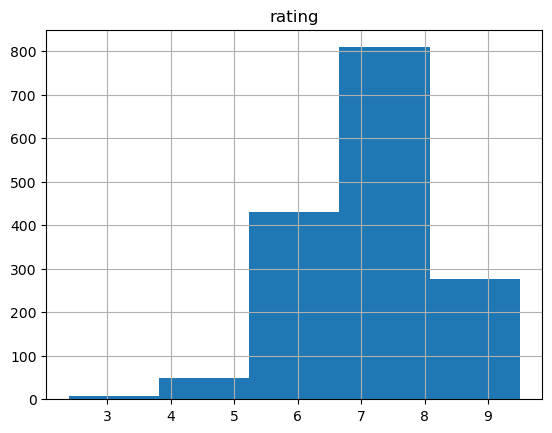

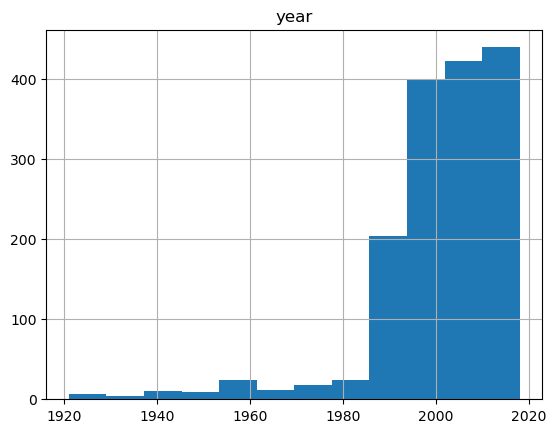

In [65]:
df.hist('rating', bins = 5)
df.hist('year', bins = 12)
plt.show()

In [68]:
# getting sentiment scores

#!pip install vaderSentiment
try: 
    import vaderSentiment
except ModuleNotFoundError:
    !conda install --yes -c conda-forge vadersentiment
    #!conda install --yes scikit-learn==1.3.2
    import vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Retrieving notices: ...working... done
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.0



## Package Plan ##

  environment location: /Users/bethany/anaconda3

  added / updated specs:
    - vadersentiment


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       h8857fd0_0         152 KB  conda-forge
    certifi-2023.11.17         |     pyhd8ed1ab_1         155 KB  conda-forge
    openssl-3.2.1              |       hd75f5a5_0         2.4 MB  conda-forge
    vadersentiment-3.3.2       |     pyhd8ed1ab_0         100 KB  conda-forge
    ------------------------------------------------------------
   

In [114]:
# function to print sentiments of sentences (code from GeeksforGeeks)
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = vaderSentiment.vaderSentiment.SentimentIntensityAnalyzer()

    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")
   
sid_obj = vaderSentiment.vaderSentiment.SentimentIntensityAnalyzer()
def get_sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    

    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    return (sentiment_dict['pos'], sentiment_dict['neg'], sentiment_dict['neu'])

In [143]:
# Adding year and month to data

review['year'] = pd.DatetimeIndex(review['review_date']).year
review['month'] = pd.DatetimeIndex(review['review_date']).month

In [135]:

#Adding three variables for positive neutral and negative scores

review['negative'] = 0
review['positive'] = 0
review['neutral'] = 0

# tqdm 
for i in range(len(review['review_summary'])):
    x = review['review_summary'][i]
    pos, neg, neu = get_sentiment_scores(x)
    review['negative'][i] = neg
    review['positive'][i] = pos
    review['neutral'][i] = neu
    if(i % 5000 == 0):
        print("Progress: " + str(i) + " / " + str(len(review['review_summary'])))


/var/folders/l6/6_z1wvmx7p96m0r32xy1n88w0000gn/T/ipykernel_3245/3725860368.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['negative'][i] = neg
/var/folders/l6/6_z1wvmx7p96m0r32xy1n88w0000gn/T/ipykernel_3245/3725860368.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['positive'][i] = pos
/var/folders/l6/6_z1wvmx7p96m0r32xy1n88w0000gn/T/ipykernel_3245/3725860368.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

Progress: 0 / 573913
Progress: 5000 / 573913
Progress: 10000 / 573913
Progress: 15000 / 573913
Progress: 20000 / 573913
Progress: 25000 / 573913
Progress: 30000 / 573913
Progress: 35000 / 573913
Progress: 40000 / 573913
Progress: 45000 / 573913
Progress: 50000 / 573913
Progress: 55000 / 573913
Progress: 60000 / 573913
Progress: 65000 / 573913
Progress: 70000 / 573913
Progress: 75000 / 573913
Progress: 80000 / 573913
Progress: 85000 / 573913
Progress: 90000 / 573913
Progress: 95000 / 573913
Progress: 100000 / 573913
Progress: 105000 / 573913
Progress: 110000 / 573913
Progress: 115000 / 573913
Progress: 120000 / 573913
Progress: 125000 / 573913
Progress: 130000 / 573913
Progress: 135000 / 573913
Progress: 140000 / 573913
Progress: 145000 / 573913
Progress: 150000 / 573913
Progress: 155000 / 573913
Progress: 160000 / 573913
Progress: 165000 / 573913
Progress: 170000 / 573913
Progress: 175000 / 573913
Progress: 180000 / 573913
Progress: 185000 / 573913
Progress: 190000 / 573913
Progress: 1

In [138]:
review.describe()

,rating,negative,positive,neutral
count,573913.000000,573913.000000,573913.000000,573913.000000
mean,6.954254,0.118550,0.259911,0.621537
std,2.956295,0.222514,0.290967,0.302458
min,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.406000
50%,8.000000,0.000000,0.195000,0.605000
75%,10.000000,0.184000,0.469000,1.000000
max,10.000000,1.000000,1.000000,1.000000


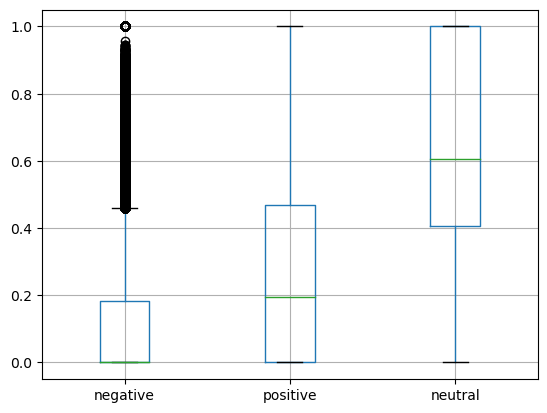

In [140]:
review.boxplot(column= ['negative', 'positive', 'neutral'])
plt.show()

In [266]:
# Specify the model
review['ratingnorm']= 0

mask = (review['rating'] > 5)

review['ratingnorm'][mask] = 1



/var/folders/l6/6_z1wvmx7p96m0r32xy1n88w0000gn/T/ipykernel_3245/1589204871.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['ratingnorm'][mask] = 1


In [267]:
review.tail()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,negative,positive,neutral,sentiment,year,month,ratingnorm,resid
573908,1,1,1,1,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties,0.0,0.412,0.588,0,1999,8,1,1.934347
573909,1,1,1,1,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie,0.0,0.000,1.000,0,1999,7,1,1.999489
573910,1,1,1,1,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen,0.0,0.412,0.588,0,1999,7,1,1.936500
573911,11 June 1999,tt0139239,ur0349105,False,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?,0.0,0.000,1.000,0,1999,6,0,-3.998358
573912,3 May 1999,tt0139239,ur0156431,False,Why was this movie made? No doubt to sucker in...,2,Go doesn't go anywhere,0.0,0.000,1.000,0,1999,5,0,-4.996205


In [248]:
# Running regression

model_formulation = smf.ols("rating ~ negative + positive  + month +year ", data = review)

# Fit the model
results = model_formulation.fit()

# View parameters
results.params

Intercept    53.700515
negative     -4.057133
positive      2.580069
month         0.002153
year         -0.023369
dtype: float64

In [249]:
model_summary = results.summary()
print(model_summary)

model_anova = statsmodels.stats.anova.anova_lm(results)
print(model_anova)

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                 3.871e+04
Date:                Sun, 04 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:56:44   Log-Likelihood:            -1.3679e+06
No. Observations:              573913   AIC:                         2.736e+06
Df Residuals:                  573908   BIC:                         2.736e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.7005      1.301     41.261      0.0

/var/folders/l6/6_z1wvmx7p96m0r32xy1n88w0000gn/T/ipykernel_3245/2088257739.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, fit=stats.norm, ax=ax1)


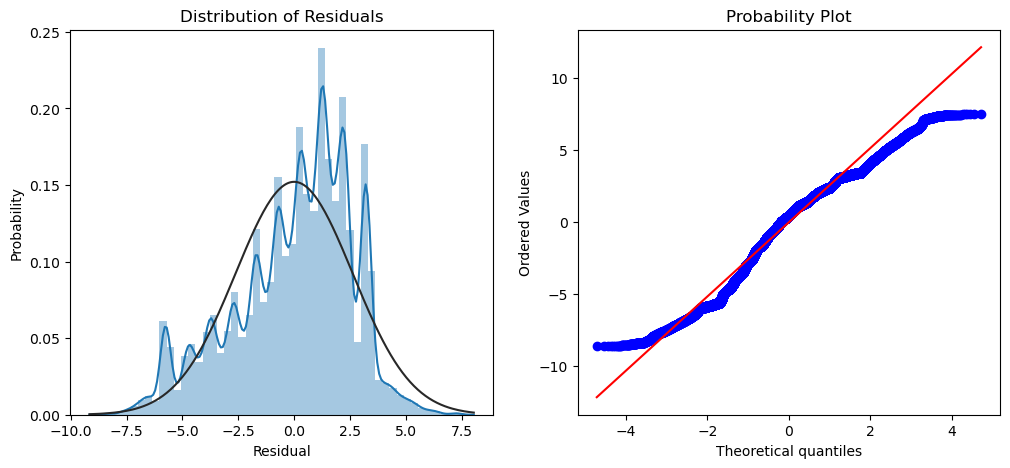

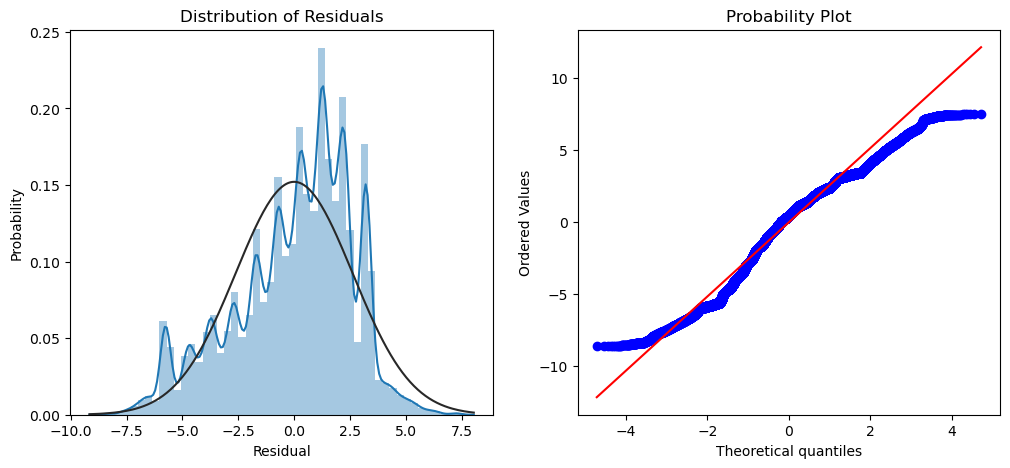

In [255]:

#Dynamic way of assessing normality of residuals, there are some outliers skewing the data slightly but overall 
# fitting a normal distribution reasonably well

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.distplot(residuals, fit=stats.norm, ax=ax1)
ax1.set_title('Distribution of Residuals')
ax1.set_xlabel('Residual')
ax1.set_ylabel('Probability')
_ = stats.probplot(residuals.ravel(), plot=ax2)
plt.show()

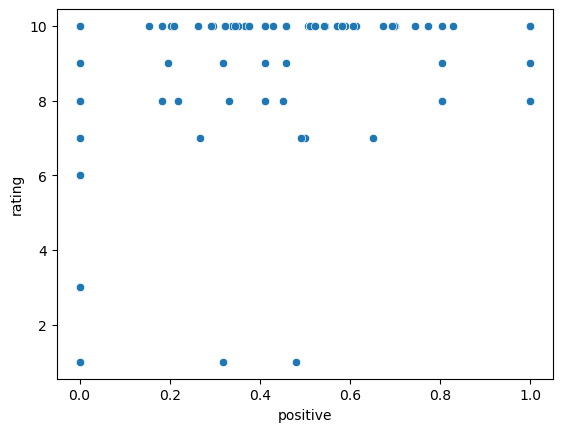

In [153]:
sns.scatterplot(data=review[0:100],  x="positive", y="rating");
# Graph the line of best fit
#sns.lineplot(data = males, x="bty_avg", y='predVal', color='orange')
#sns.lineplot(data = females, x="bty_avg", y='predVal', color='blue')
plt.show()

In [158]:
review.describe()

,rating,negative,positive,neutral,sentiment,year,month
count,573913.000000,573913.000000,573913.000000,573913.000000,573913.0,573913.000000,573913.000000
mean,6.954254,0.118550,0.259911,0.621537,0.0,2009.049863,6.528671
std,2.956295,0.222514,0.290967,0.302458,0.0,5.355981,3.541069
min,1.000000,0.000000,0.000000,0.000000,0.0,1998.000000,1.000000
25%,5.000000,0.000000,0.000000,0.406000,0.0,2005.000000,3.000000
50%,8.000000,0.000000,0.195000,0.605000,0.0,2009.000000,7.000000
75%,10.000000,0.184000,0.469000,1.000000,0.0,2014.000000,10.000000
max,10.000000,1.000000,1.000000,1.000000,0.0,2018.000000,12.000000


In [191]:
# Trying to tokenize

!pip install autocorrect
from autocorrect import spell

import nltk 
import sklearn


nltk.download("punkt")
from nltk.tokenize import word_tokenize
import re 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer




    
    

[nltk_data] Downloading package punkt to /Users/bethany/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bethany/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [256]:
review_sample = review[0:20000]

def preprocess(sms):

    sms = re.sub('[^A-Za-z]', ' ', sms)
    sms = sms.lower()

    tokenized_sms = word_tokenize(sms)

    
    for word in tokenized_sms:
        if word in stopwords.words('english'):
            tokenized_sms.remove(word)
        
    sms_text = " ".join(tokenized_sms)
    
    return sms_text

In [257]:
#print(preprocess(review_sample['review_summary'][0]))
review_sample['trunc']=review_sample['review_summary'].apply(preprocess)


/var/folders/l6/6_z1wvmx7p96m0r32xy1n88w0000gn/T/ipykernel_3245/3857744529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_sample['trunc']=review_sample['review_summary'].apply(preprocess)


In [258]:
review_sample['trunc'].head()

0    classic piece unforgettable film making
1               simply amazing best film the
2                  best story ever told film
3                     busy dying busy living
4          great story wondrously told acted
Name: trunc, dtype: object

In [259]:
#review['sentiments'] = review['review_text'].apply(sentiment_scores) 
review_sample['negative'] = 0
review_sample['positive'] = 0
review_sample['neutral'] = 0

# tqdm 
for i in range(len(review_sample['trunc'])):
    x = review_sample['trunc'][i]
    pos, neg, neu = get_sentiment_scores(x)
    review_sample['negative'][i] = neg
    review_sample['positive'][i] = pos
    review_sample['neutral'][i] = neu
    if(i % 5000 == 0):
        print("Progress: " + str(i) + " / " + str(len(review_sample['trunc'])))


/var/folders/l6/6_z1wvmx7p96m0r32xy1n88w0000gn/T/ipykernel_3245/3079463590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_sample['negative'] = 0
/var/folders/l6/6_z1wvmx7p96m0r32xy1n88w0000gn/T/ipykernel_3245/3079463590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_sample['positive'] = 0
/var/folders/l6/6_z1wvmx7p96m0r32xy1n88w0000gn/T/ipykernel_3245/3079463590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Progress: 0 / 20000
Progress: 5000 / 20000
Progress: 10000 / 20000
Progress: 15000 / 20000


In [264]:
# Specify the model
model_formula = smf.ols("rating ~ negative + positive  + month + year ", data = review_sample)

# Fit the model
results = model_formula.fit()

# View parameters
results.params

Intercept   -38.457585
negative     -3.423974
positive      1.044260
month         0.011581
year          0.023404
dtype: float64

In [265]:
model_summary = results.summary()
print(model_summary)

model_anova = statsmodels.stats.anova.anova_lm(results)
print(model_anova)



                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     769.3
Date:                Sun, 04 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:14:26   Log-Likelihood:                -43059.
No. Observations:               20000   AIC:                         8.613e+04
Df Residuals:                   19995   BIC:                         8.617e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -38.4576      5.530     -6.955      0.0